# Template Matching Algorithm

### This template matching algorithm is used to match the a4 size template provided with the template present in the image captured by wildlife camera trap and create the rectangular bounding box within the matched template. Here, template_path is the path for the path were template is located and image_path is the path where the image captured by camera trap is located. After creating the rectangular bounding for the matched template in the image this algorithm saved the cropped image in the folder.

### This is the required dependencies for the tenplate matching algorithm

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
import os

### Importing the template and image from the path

In [8]:
# Specify the path to the template image
template_path = 'data/templates/circle_template.png'
# Load the target image in color
image_path = 'data/full_images/image1.JPG'

### Template in grayscale

In [9]:
# Load the template image in grayscale
template_gray = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

# Check if the template image was loaded successfully
if template_gray is None:
    print("Error loading template image")
    exit()

# Convert the template image to color
template = cv2.cvtColor(template_gray, cv2.COLOR_GRAY2BGR)

### Read the image

In [10]:
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the target image was loaded successfully
if image is None:
    print(f"Error loading image: {image_path}")
    exit()

# Create a copy of the target image for plotting
result_image = image.copy()

In [11]:
# Best match variables
best_match_value = 0
best_match_loc = None
best_match_scale = None

### Here scale can be changed as per the requirement for the best matching of our template with the template in image

In [12]:
# Iterate through different scales
for scale in np.arange(0.01, 2.0, 0.01):
    # Calculate the new dimensions of the scaled template
    new_width = int(template.shape[1] * scale)
    new_height = int(template.shape[0] * scale)

    # Resize the template image
    resized_template = cv2.resize(template, (new_width, new_height))

    # Perform template matching
    result = cv2.matchTemplate(image, resized_template, cv2.TM_CCOEFF_NORMED)

    # Get the maximum match value and its location
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Update the best match variables if a better match is found
    if max_val > best_match_value:
        best_match_value = max_val
        best_match_loc = max_loc
        best_match_scale = scale

### This is the hyperparameters which can be changed to find the perfect match

In [13]:
# Check if a perfect match is found
threshold = 0.6

Cropped image saved: data/images\cropped_image1.JPG
Scale of the best match: 0.37


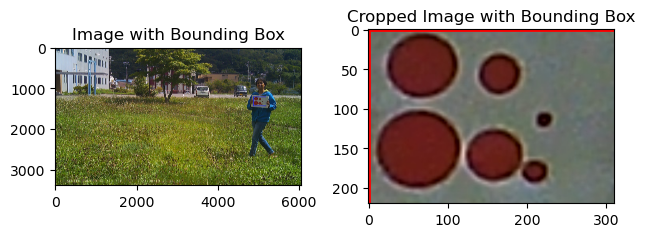

In [14]:
if best_match_value > threshold:
    # Calculate the final dimensions of the template
    final_width = int(template.shape[1] * best_match_scale)
    final_height = int(template.shape[0] * best_match_scale)

    # Calculate the top left and bottom right coordinates of the bounding box
    top_left = best_match_loc
    bottom_right = (best_match_loc[0] + final_width, best_match_loc[1] + final_height)

    # Draw the rectangular bounding box on the result image
    cv2.rectangle(result_image, top_left, bottom_right, (255, 0, 0), 10)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # Display the result image with the bounding box in the first subplot
    ax1.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    ax1.set_title('Image with Bounding Box')

    # Crop the rectangular bounding box from the original image
    cropped_image = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

        # Display the cropped image with the bounding box in the second subplot
    ax2.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    ax2.set_title('Cropped Image with Bounding Box')

    # Draw the rectangular bounding box on the cropped image
    rect = patches.Rectangle((0, 0), final_width, final_height, linewidth=2, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)

    # Adjust the subplot layout to make room for the bounding box
    fig.tight_layout()

    # Create a directory to save the cropped images
    output_folder = 'data/images'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Generate a unique filename for the cropped image
    image_filename = os.path.basename(image_path)
    output_filename = os.path.join(output_folder, f"cropped_{image_filename}")

    # Save the cropped image
    cv2.imwrite(output_filename, cropped_image)

    print(f"Cropped image saved: {output_filename}")

    # Print the scale of the best match
    print(f"Scale of the best match: {best_match_scale}")

# Display the plot
plt.show()